In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


tunnel = pd.read_csv("tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")


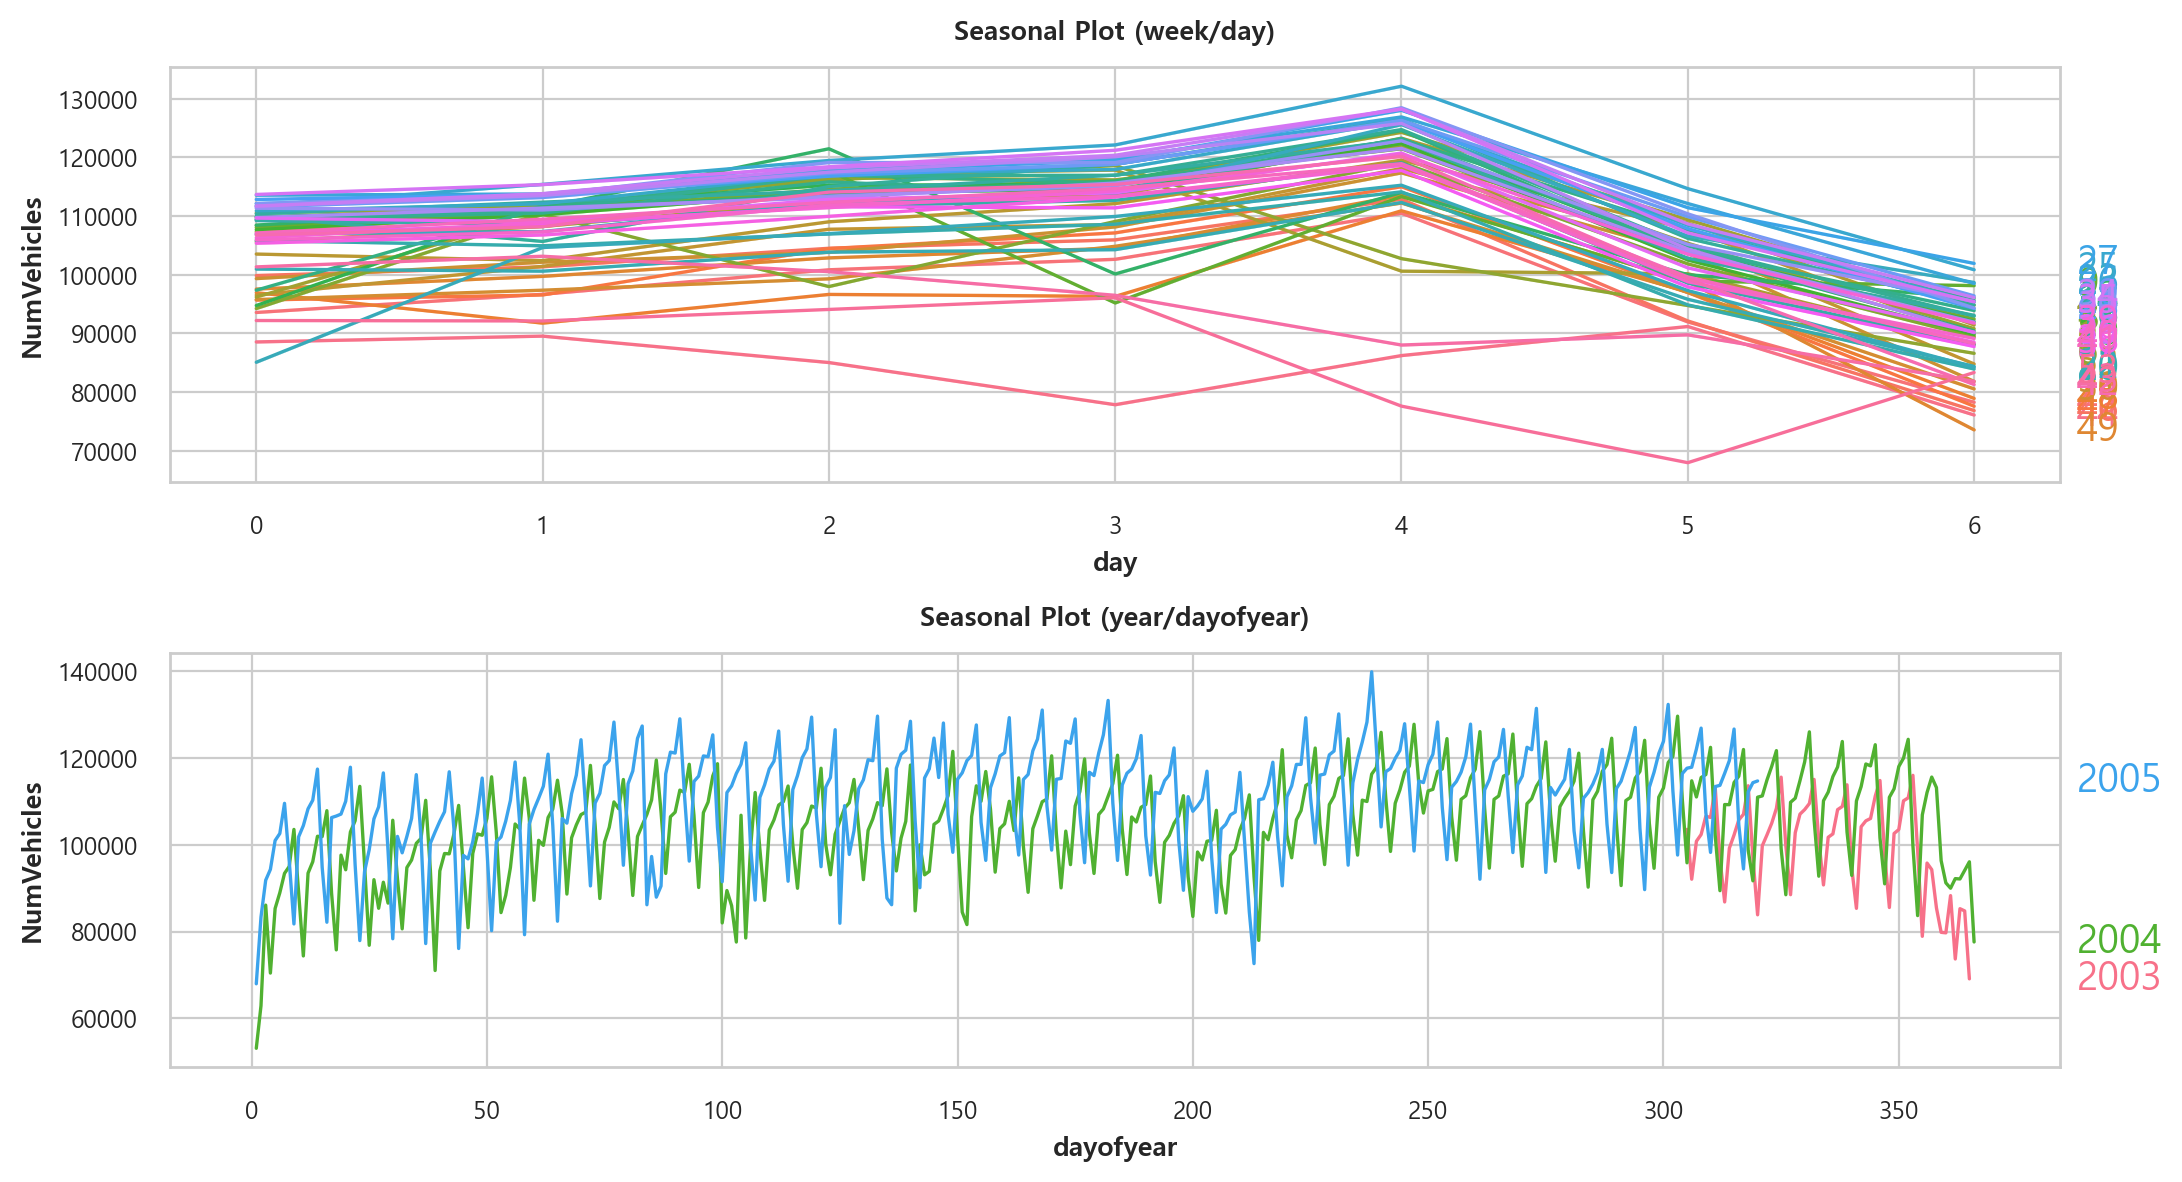

In [48]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1);

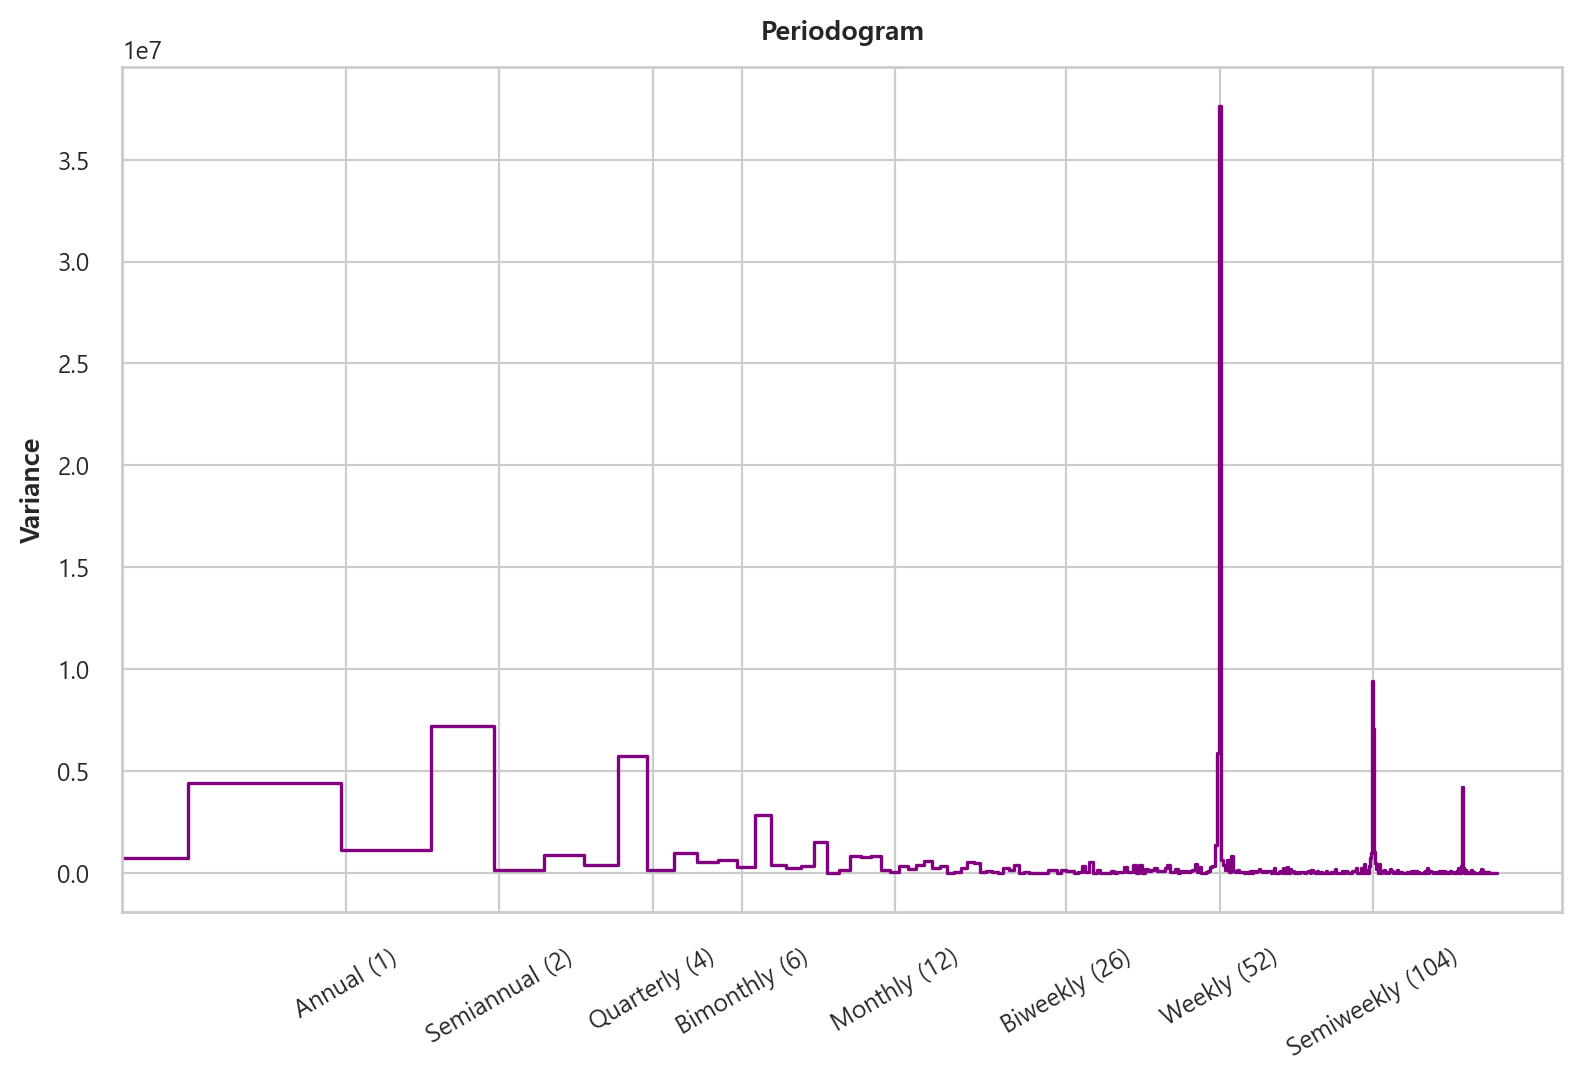

In [49]:
plot_periodogram(tunnel.NumVehicles);

In [50]:
snp_500[["Close"]]

,Close
Date,
1927-12-30,17.660000
1928-01-03,17.760000
1928-01-04,17.719999
1928-01-05,17.549999
1928-01-06,17.660000
...,...
2020-10-29,3310.110107
2020-10-30,3269.959961
2020-11-02,3310.239990


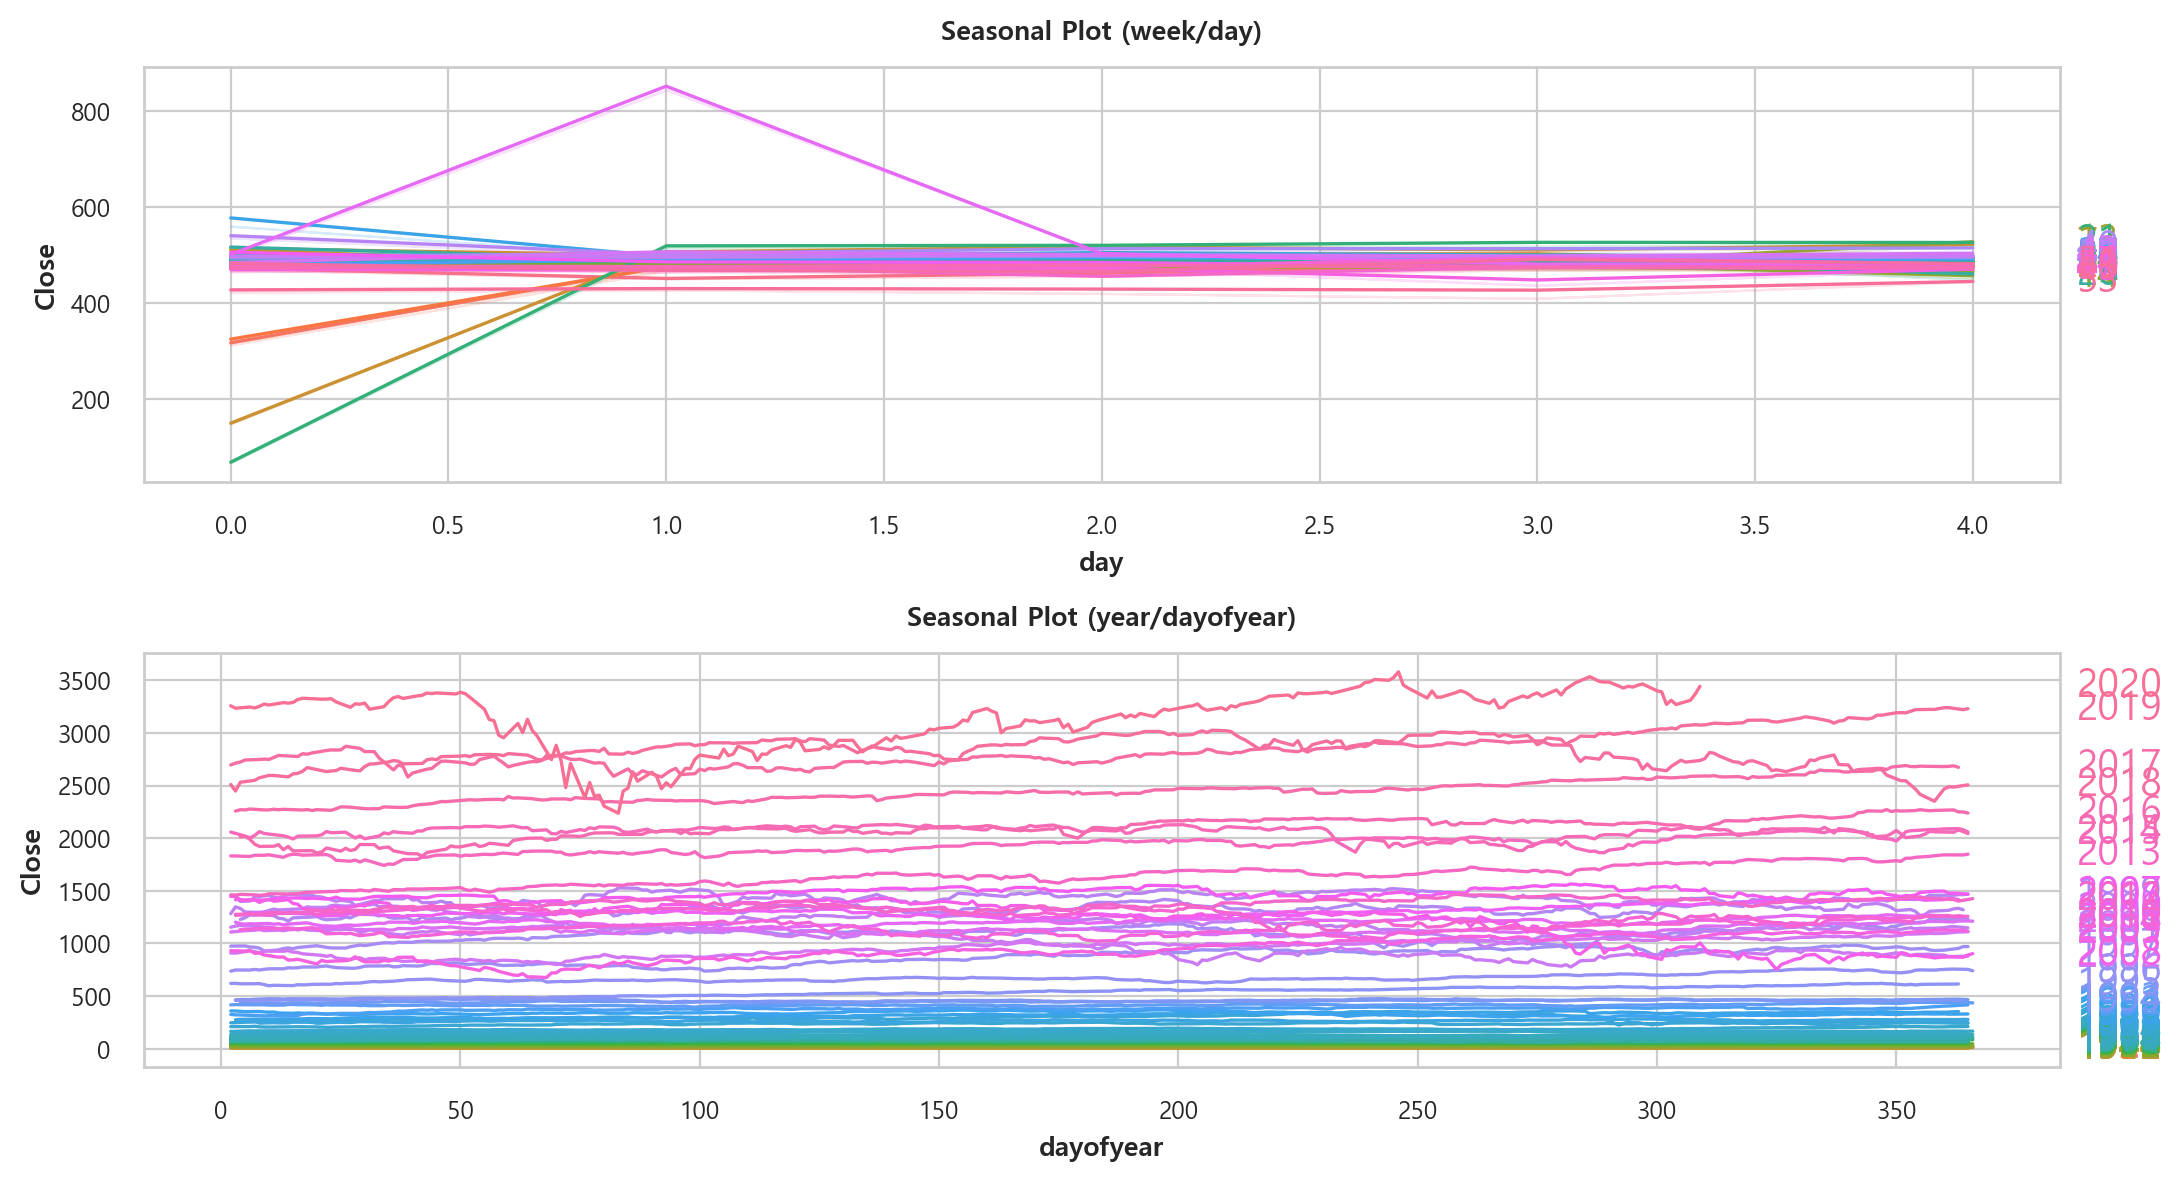

In [51]:
# 데이터 불러오기
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      parse_dates=['Date'],index_col="Date")

snp_500 = snp_500[["Close"]]
X = snp_500.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="Close", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="Close", period="year", freq="dayofyear", ax=ax1);

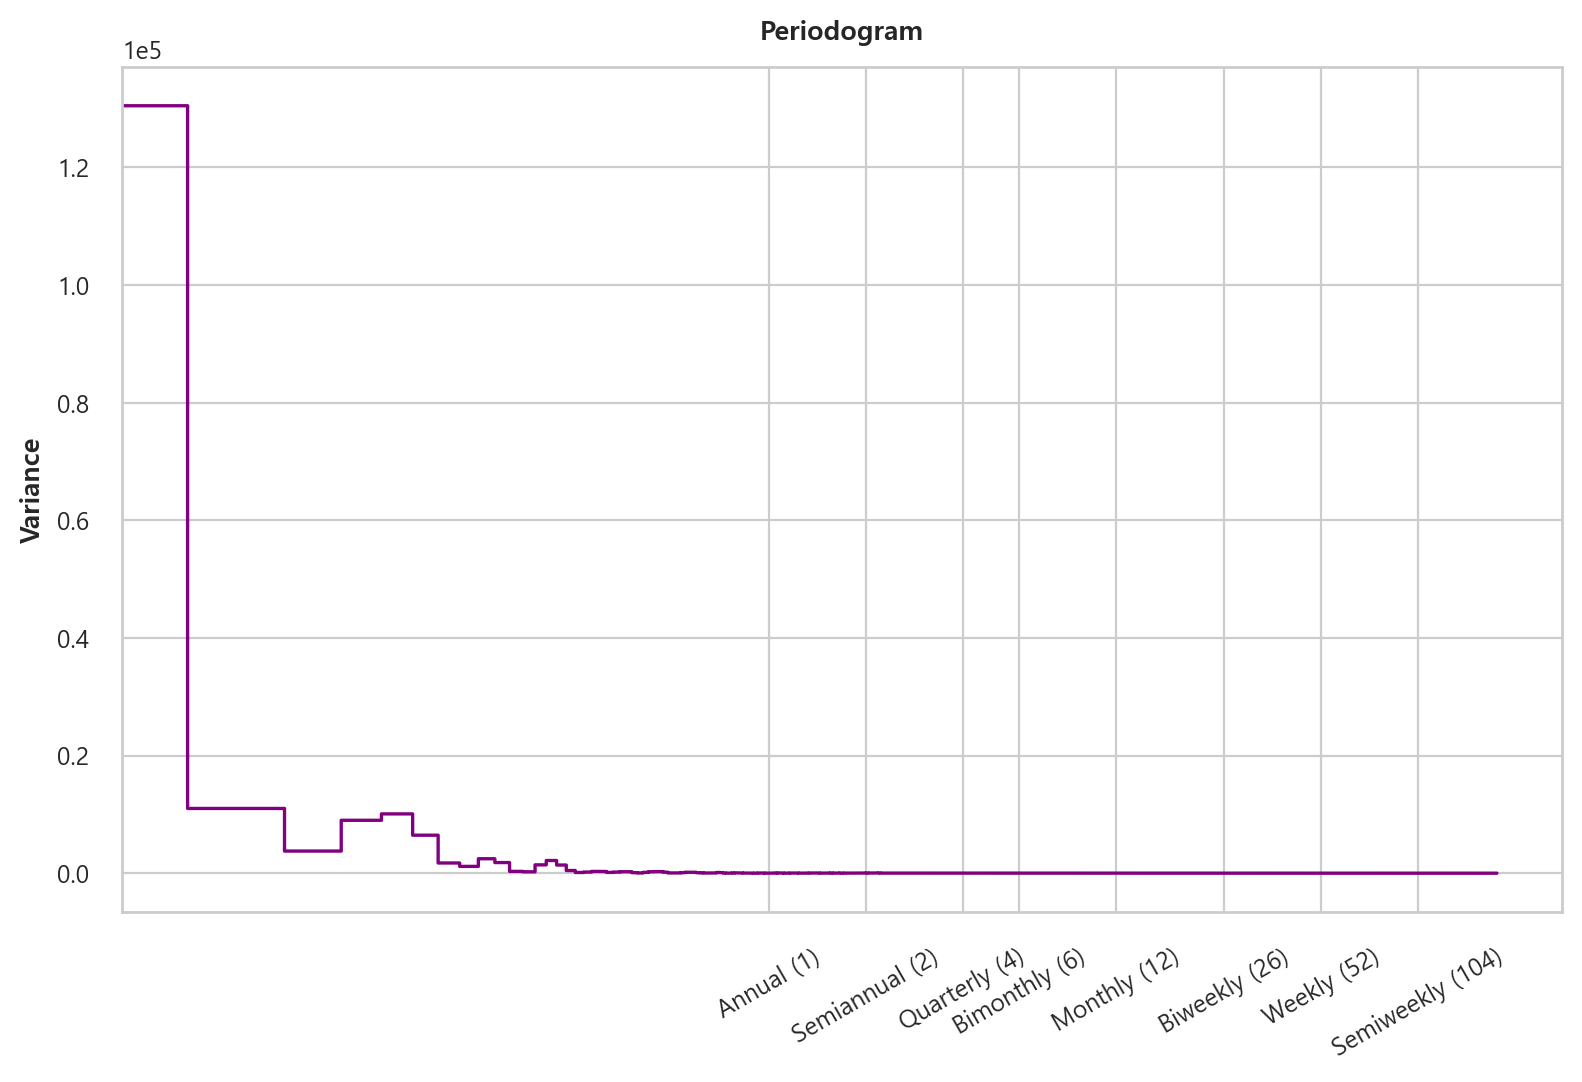

In [52]:
plot_periodogram(X["Close"]);


Text(0.5, 0, 'Hz = 1/일')

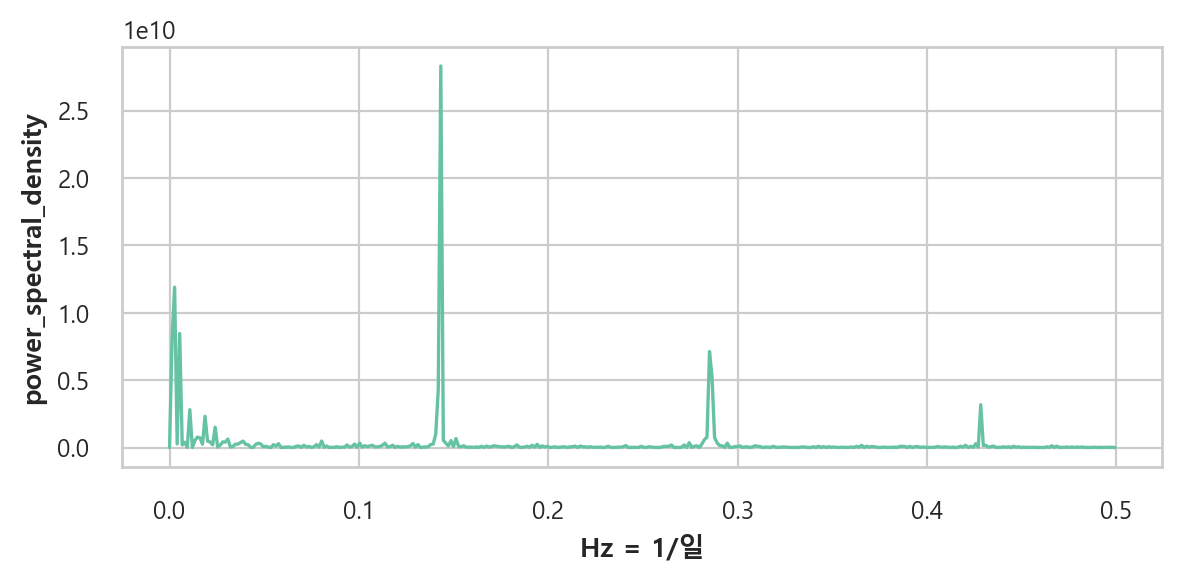

In [53]:
import pandas as pd
import numpy as np
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Periodogram 계산
frequencies, power_spectral_density = signal.periodogram(tunnel["NumVehicles"])

fig, ax = plt.subplots(1,1,figsize=(6, 3))
# Periodogram 시각화
sns.lineplot(x=frequencies,
             y=power_spectral_density,ax=ax);

plt.ylabel("power_spectral_density")
plt.xlabel("Hz = 1/일")

In [54]:
max_of_density = power_spectral_density.argmax() # 1
1 / frequencies[max_of_density]

6.981308411214953

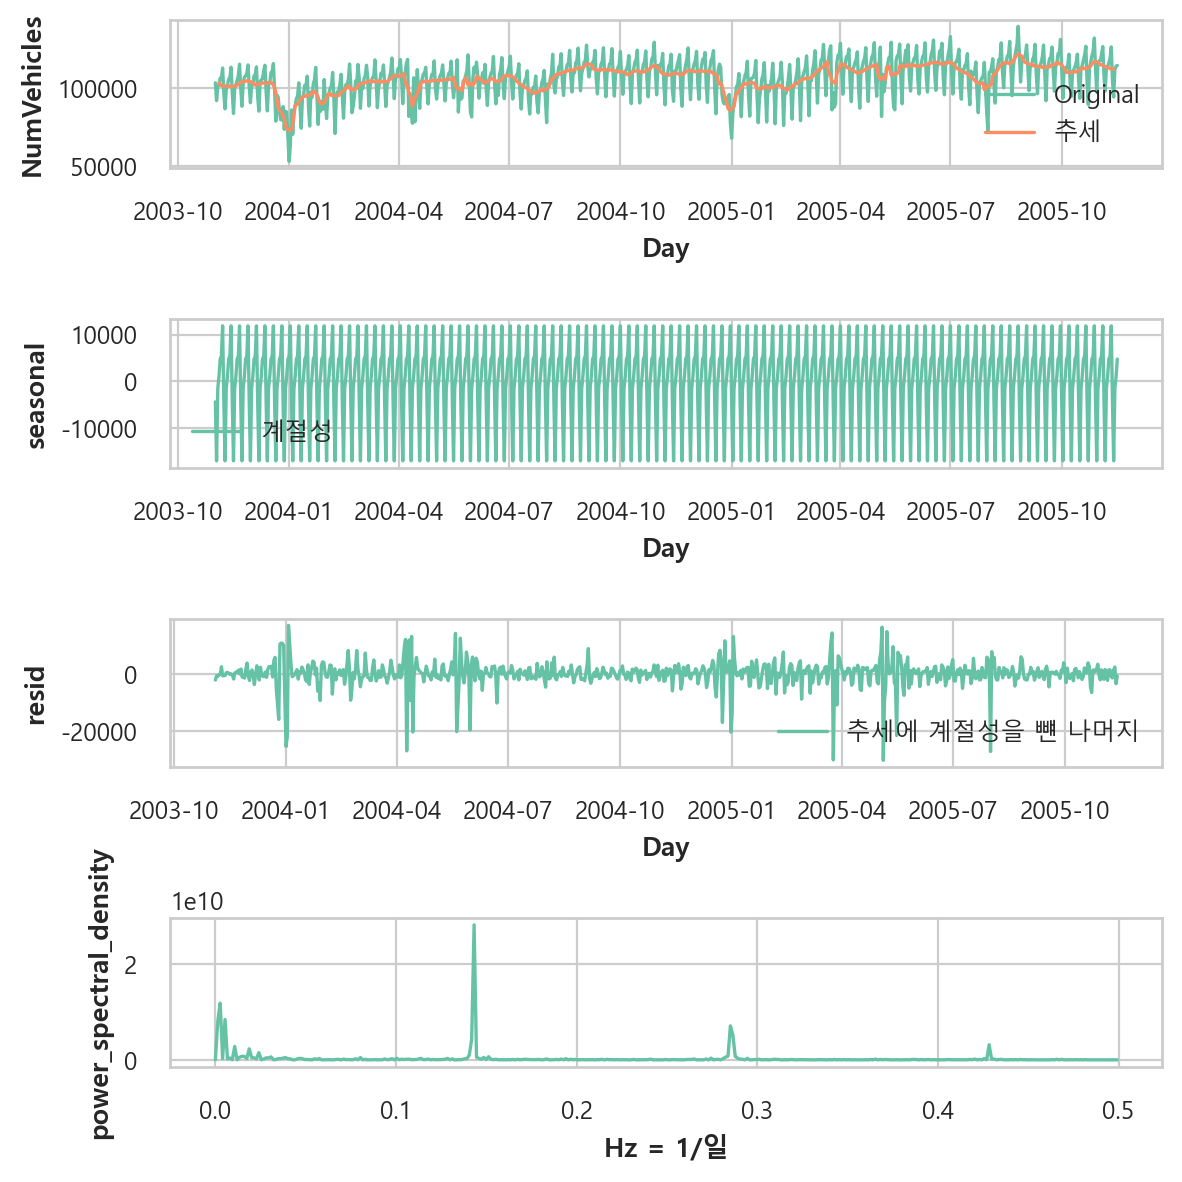

In [57]:
tunnel.index = tunnel.index.astype("datetime64")
tunnel["NumVehicles"]

# 주기적인 시계열 분해를 통한 주기성 분석
decomposition = seasonal_decompose(tunnel["NumVehicles"], period=7)  # 예시로 주별 주기 설정

# 시계열 분해 결과 시각화
fig, ax = plt.subplots(4,1,figsize=(6, 6))

sns.lineplot(tunnel["NumVehicles"],label='Original',ax=ax[0])
sns.lineplot(decomposition.trend,label='추세',ax=ax[0])
sns.lineplot(decomposition.seasonal,label='계절성',ax=ax[1])
sns.lineplot(decomposition.resid,label='추세에 계절성을 뺸 나머지',ax=ax[2])

# Periodogram 계산
frequencies, power_spectral_density = signal.periodogram(tunnel["NumVehicles"])

# Periodogram 시각화
sns.lineplot(x=frequencies,
             y=power_spectral_density,ax=ax[3]);

plt.ylabel("power_spectral_density")
plt.xlabel("Hz = 1/일");

In [58]:
tunnel["NumVehicles"]

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
               ...  
2005-11-12    104646
2005-11-13     94424
2005-11-14    112165
2005-11-15    114296
2005-11-16    114690
Freq: D, Name: NumVehicles, Length: 747, dtype: int64

<AxesSubplot: xlabel='Day'>

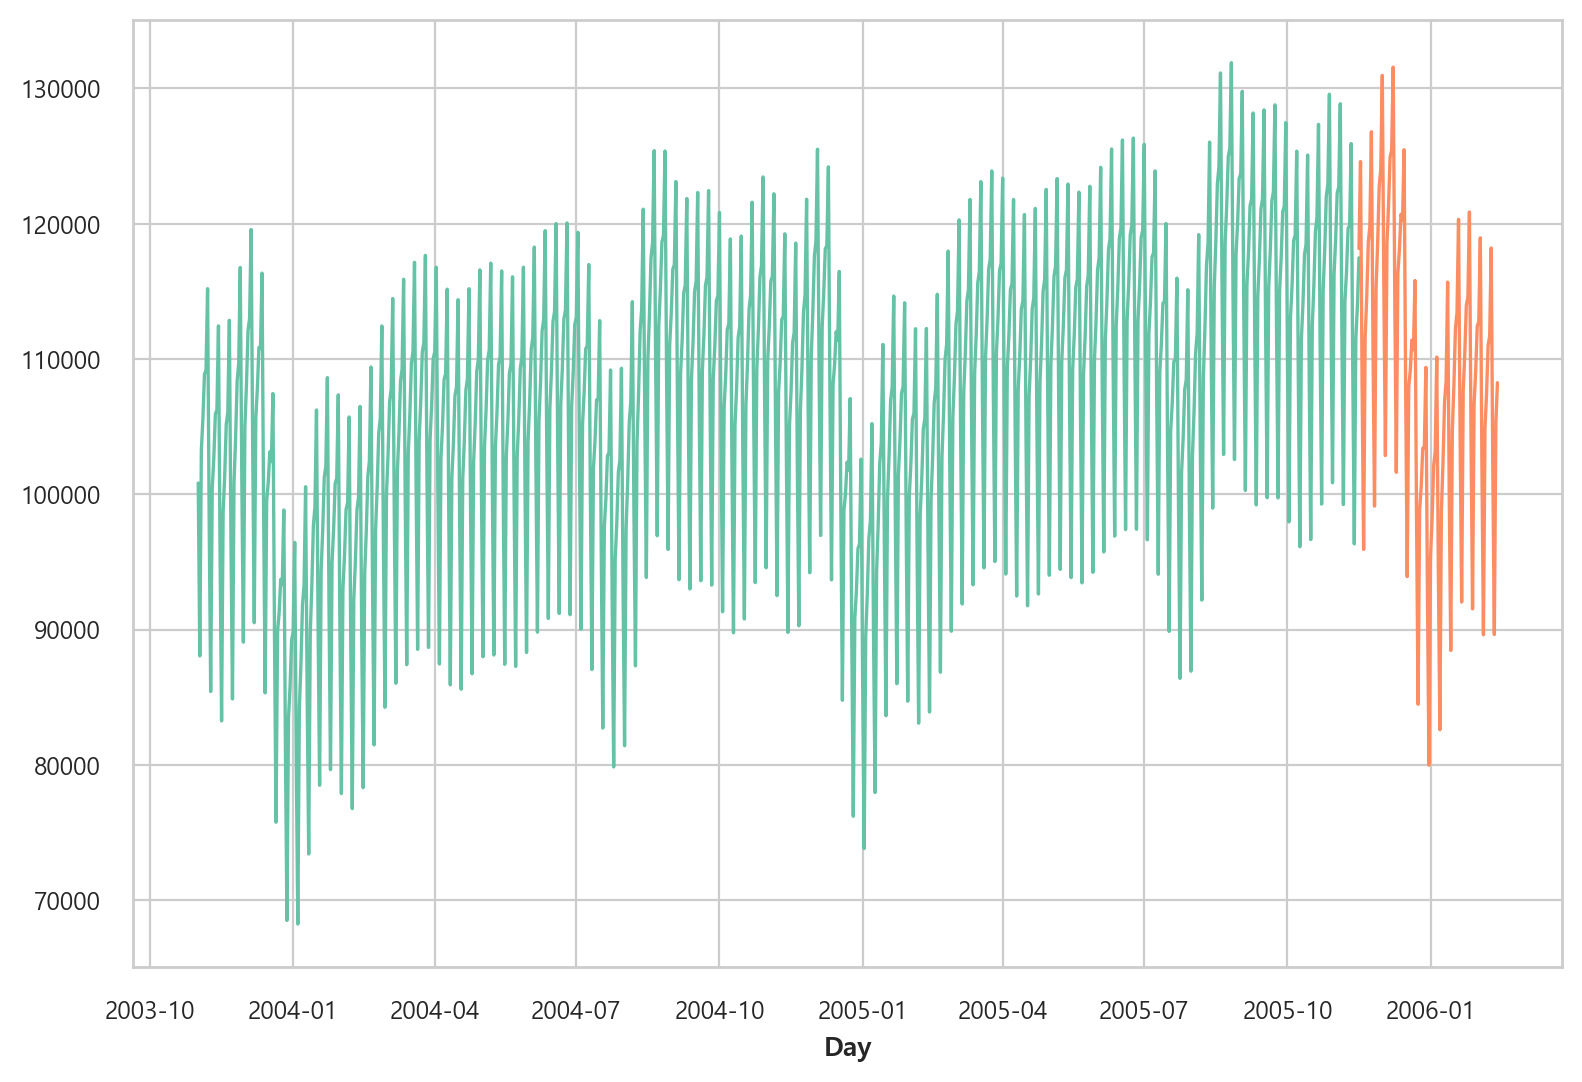

In [103]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
import pandas as pd

""" freq
Y 연간
Q 분기별
M 월별
W 주간
D 일간
H 시간당

order 몇개의 주파수의 조합으로 이루어 지게 할지
"""

fourier = CalendarFourier(freq="A", order=10)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index=tunnel.index,
    constant=True,  # dummy feature for bias (y-intercept)
    order=1,    # trend 를 포함 할지 _즉 데이터가 시간에따라 선형적으로 변한다면 1
    seasonal=True,  # 주간 계절성
    period=7,  # 주간 계절성
    additional_terms=[fourier], # 연간 계절성을 추가로 포함 (위에 정의한 fourier)
    drop=True,  # 다중 공선성(collinearity)을 일으킬 수 있는 항목들을 자동으로 제거합니다.
)

X = dp.in_sample()  # create features for dates in tunnel.index

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=y.index)


# Forecasting
forecast_index = pd.date_range(start=tunnel.index[-1], periods=90, freq='D')
X_fore = dp.out_of_sample(steps=90, forecast_index=forecast_index)
y_fore = pd.Series(model.predict(X_fore), index=forecast_index)

fig, ax = plt.subplots()

# Plotting
# sns.lineplot(y,ax=ax)
sns.lineplot(y_pred,ax=ax)
sns.lineplot(y_fore,ax=ax)
